In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import networkx as nx  
import pandas as pd
import numpy as np
import gc


In [2]:
#LOAD DATA FROM CSV
# followers
df_f = pd.read_csv(r'.\2015\df_f.csv', index_col=0, dtype = {'user_id':'str','follower_id':'str'} )


C:\Users\zyan\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df_f.head()

,user_id,follower_id
0,2,1
1,4,1
2,6,1
3,2695,1
4,2711,1


In [4]:
#LOAD DATA FROM CSV
#user id's
df_u = pd.read_csv(r'.\2015\df_u.csv', index_col=0, dtype = {'id':'str','login':'str','type':'str', 'fake':'str', 'deleted':'str'} )

In [5]:
df_u.head()

,id,login,type,fake,deleted
0,1,tosch,USR,0,0
1,2,jmettraux,USR,0,0
2,3,SMGNMSKD,USR,1,0
3,4,kennethkalmer,USR,0,0
4,5,weppos,USR,0,0


### Create the directed graph

In [6]:
# the directed graph maps the direction as: [follower --> user]
# therefore, we need to swap the columns
df_temp = df_f.reindex(columns=['follower_id', 'user_id']).copy()

In [8]:
del df_f

In [10]:
gc.collect()
gc.collect()

20

0

In [11]:
#create empty directed Graph
followers_graph = nx.DiGraph()

In [12]:
# fill  the directed graph using the dataframe as a list
followers_graph.add_edges_from(df_temp.values.tolist())

In [13]:
print(nx.info(followers_graph))

Name: 
Type: DiGraph
Number of nodes: 1556637
Number of edges: 7022950
Average in degree:   4.5116
Average out degree:   4.5116


In [ ]:
#plt.figure(figsize=(20,14))
#nx.draw(followers_graph, pos=nx.spring_layout(followers_graph), node_color='lightblue',
#    linewidths=0.25, font_size=10, font_weight='light', with_labels=True, dpi=2000)
#plt.show()


In [ ]:
#save image
#plt.savefig('followers-network.png', format='png', dpi=1200)

### Some statistics

In [14]:
print ("Strongly Connected Components = ", nx.number_strongly_connected_components(followers_graph) )

Strongly Connected Components =  992176


In [15]:
print ("Weakly connected components = ", nx.number_weakly_connected_components(followers_graph) )

Weakly connected components =  62867


### Utility functions

In [16]:
# returns 4 dictionaries:
# in_deg_freq --> (key=in_degree value, value=count of nodes with that degree)
# all_in_deg  --> (key=node id, value=degree of node) (native function of NetworkX does not return a dictionary)
# out_deg_freq--> (key=in_degree value, value=count of nodes with that degree)
# all_out_deg --> (key=node id, value=degree of node) (native function of NetworkX does not return a dictionary)

def degree_freq(graph):
    in_deg_freq = {}
    all_in_deg ={}

    out_deg_freq = {}
    all_out_deg ={}
    
    for n in graph.nodes():
        in_deg = graph.in_degree(n)
        out_deg= graph.out_degree(n)
        
        all_in_deg[n] = in_deg
        all_out_deg[n]= out_deg
        
        if in_deg not in in_deg_freq:
            in_deg_freq[in_deg] = 0
        in_deg_freq[in_deg]+= 1
        
        if out_deg not in out_deg_freq:
            out_deg_freq[out_deg] = 0
        out_deg_freq[out_deg]+= 1      
    
    return in_deg_freq, all_in_deg, out_deg_freq, all_out_deg

In [17]:
# calculates some statistics
in_deg_freq, all_in_deg, out_deg_freq, all_out_deg = degree_freq(followers_graph)

In [18]:
#parses list of indegree values and outdegree values
idf = (sorted(in_deg_freq.items()))
odf = (sorted(out_deg_freq.items()))

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Degree')

Text(0, 0.5, 'Number of nodes')

Text(0.5, 1.0, 'Followers network in Github')

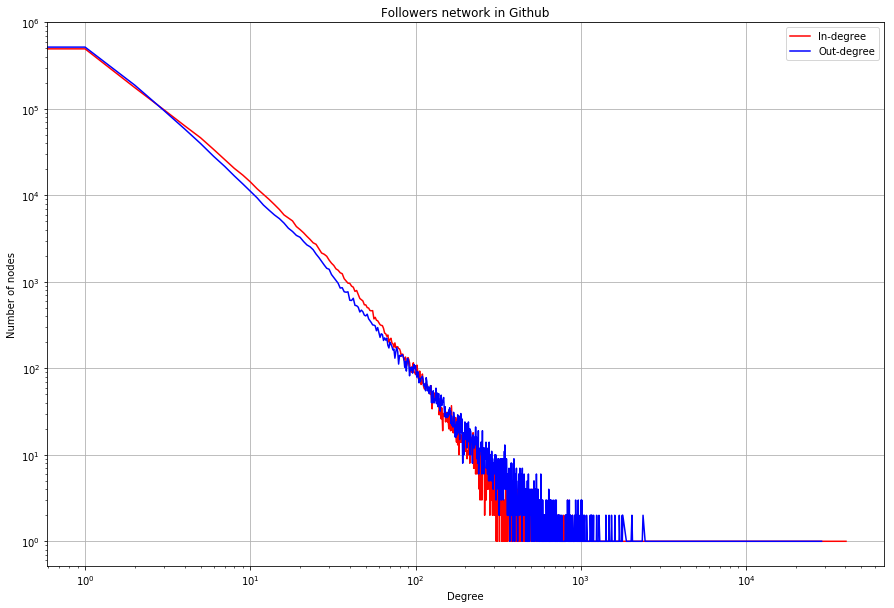

In [19]:
#plot degree frequency

plt.figure(figsize =(15, 10))
plt.grid(True)
plt.loglog([k for (k,v) in idf], [v for (k,v ) in idf], 'r-') # in-degree
plt.loglog([k for (k,v) in odf],[v for (k,v ) in odf], 'b-')  # out-degree
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Followers network in Github')


In [20]:
# save generated image
plt.savefig(r'.\2015\degree_freq_2015.png')

<Figure size 432x288 with 0 Axes>

### Calculate Page Rank

In [21]:
# calculates page rank over the whole network of users / followers
# the function returns a dictionary
page_rank = nx.pagerank(followers_graph)

In [22]:
# More utility functions

#Given a dictionary, orders it by key (descending order) and returns a list of tuples, with it's N-top keys and values
def get_top_keys(dictionary, top):
    item = list(reversed(sorted(dictionary.items())))
    return item[:top]

#Given a dictionary, orders it by value (descending order) and returns a
# smaller dictionary with the N-top keys and values
def get_top_values(d, t):
    new_d={}
    sorted_keys = sorted(d, key=d.get, reverse=True)
    
    for x in sorted_keys[:t]:
        new_d[x] = d[x]

    return new_d

In [26]:
#save result in csv
pd.DataFrame.from_dict(data=page_rank, orient='index').to_csv(r'.\2015\page_rank.csv')

In [27]:
# calculate top users with highest page rank values
top_page_rank = get_top_values(page_rank, 10)

print(top_page_rank.keys())


dict_keys(['3564691', '2755100', '1631799', '2061191', '4082399', '827248', '5956845', '10561', '37617', '13431'])


In [28]:
# identify the user names found in top rank
df_u.loc [ df_u['id'].isin( top_page_rank.keys() )]

,id,login,type,fake,deleted
10184,10561,h4ck3rm1k3,USR,0,0
12934,13431,chovy,USR,0,0
35687,37617,STRd6,USR,0,0
700212,827248,csjaba,USR,0,0
1443760,1631799,fordream,USR,0,0
1854215,2061191,hehead,USR,0,0
2518428,2755100,threejs-cn,USR,0,0
3311357,3564691,martinstojcevski5,USR,0,0
3768486,4082399,arrival,USR,0,0
4752949,5956845,4148,USR,0,0


### Calculate HITS

In [29]:
#calculates Hubs and Authorities, returns two dictionaries
hubs, auth = nx.hits(followers_graph)

In [30]:
print (len(hubs))

1556637


In [31]:
print (len(auth))

1556637


In [32]:
#save results in a csv file
(pd.DataFrame.from_dict(data=hubs, orient='index').to_csv(r'.\2015\hubs.csv'))
(pd.DataFrame.from_dict(data=auth, orient='index').to_csv(r'.\2015\auth.csv'))

In [33]:
top_hubs = get_top_values(hubs, 10)

print(top_hubs)


{'5203': 0.0010805389588574715, '376498': 0.0010799024864216712, '1779': 0.0010726456777581659, '9236': 0.0010488577041931684, '1954': 0.000987495353442257, '1570': 0.0009374323971436608, '6240': 0.0007845351265363139, '24452': 0.0007218026639443093, '1736': 0.0007039756829192942, '1199': 0.000659694793737111}


In [34]:
# identify the user names found in top hubs
df_u.loc [ df_u['id'].isin( top_hubs.keys() )]

,id,login,type,fake,deleted
1117,1199,substack,USR,0,0
1485,1570,defunkt,USR,0,0
1650,1736,douglascrockford,USR,0,0
1692,1779,paulirish,USR,0,0
1798,1954,visionmedia,USR,0,0
4966,5203,torvalds,USR,0,0
5973,6240,addyosmani,USR,0,0
8885,9236,mojombo,USR,0,0
23536,24452,jeresig,USR,0,0
344193,376498,Tj,USR,0,0


In [35]:
top_auths = get_top_values(auth, 10)

print(top_auths)


{'58': 0.001029702871214184, '2755100': 0.0009996766398117454, '3564691': 0.0008376906657431941, '827248': 0.0007636197756196144, '302': 0.0007479036520600018, '13431': 0.0006068635147349321, '1631799': 0.000581919739467671, '44782': 0.0004369407460987627, '2313223': 0.0003855324365872052, '2774706': 0.00038153321793963084}


In [36]:
# identify the user names found in top authorities
df_u.loc [ df_u['id'].isin( top_auths.keys() )]

,id,login,type,fake,deleted
57,58,hcilab,USR,0,0
250,302,equus12,USR,0,0
12934,13431,chovy,USR,0,0
42112,44782,trietptm,USR,0,0
700212,827248,csjaba,USR,0,0
1443760,1631799,fordream,USR,0,0
2097245,2313223,SuriyaaKudoIsc,USR,0,0
2518428,2755100,threejs-cn,USR,0,0
2537749,2774706,Jacktony,USR,0,0
3311357,3564691,martinstojcevski5,USR,0,0


### Calculate population and No. of followers, mean, std, median

In [37]:
in_deg_mean = np.mean(list(all_in_deg.values()))

out_deg_mean= np.mean(list(all_out_deg.values()))

print("Average in degree: ", in_deg_mean)
print("Average out degree: ", out_deg_mean)


Average in degree:  4.511617030817075
Average out degree:  4.511617030817075


In [40]:
#standar deviation, in degreee values
np.std(list(all_in_deg.values()))


58.83985510167124

In [41]:
#variance, in degreee values
np.var(list(all_in_deg.values()))

3462.1285483856673

In [42]:
#users with more followers
top_followers = get_top_values(all_in_deg, 10)
print ( top_followers )

{'2755100': 40306, '3564691': 27307, '58': 21744, '1631799': 17823, '827248': 16767, '13431': 16066, '302': 13465, '2061191': 12029, '44782': 11034, '37617': 9407}


In [43]:
df_u.loc [ df_u['id'].isin( top_followers.keys() )]

,id,login,type,fake,deleted
57,58,hcilab,USR,0,0
250,302,equus12,USR,0,0
12934,13431,chovy,USR,0,0
35687,37617,STRd6,USR,0,0
42112,44782,trietptm,USR,0,0
700212,827248,csjaba,USR,0,0
1443760,1631799,fordream,USR,0,0
1854215,2061191,hehead,USR,0,0
2518428,2755100,threejs-cn,USR,0,0
3311357,3564691,martinstojcevski5,USR,0,0


In [45]:
#save results in a csv file
(pd.DataFrame.from_dict(data=in_deg_freq, orient='index').to_csv(r'.\2015\in_deg_freq.csv'))
(pd.DataFrame.from_dict(data=all_in_deg, orient='index').to_csv(r'.\2015\all_in_deg.csv'))
(pd.DataFrame.from_dict(data=out_deg_freq, orient='index').to_csv(r'.\2015\out_deg_freq.csv'))
(pd.DataFrame.from_dict(data=all_out_deg, orient='index').to_csv(r'.\2015\all_out_deg.csv'))

### Centrality measure

In [46]:
eigenv_centrality= nx.eigenvector_centrality(followers_graph)

In [47]:
#save results in a csv file
(pd.DataFrame.from_dict(data=eigenv_centrality, orient='index').to_csv(r'.\2015\eigenv_centrality.csv'))


In [48]:
#users with highest centrality values
top_eigen_centrality = get_top_values(eigenv_centrality, 10)

print ( top_eigen_centrality )

{'2755100': 0.4456918670148013, '3564691': 0.2772149112718081, '827248': 0.24370074910451528, '58': 0.2034047642742266, '89616': 0.19135014191598443, '2755251': 0.18450985805432488, '13431': 0.1719804744763178, '2061191': 0.16356090187261824, '1631799': 0.16240473205038664, '302': 0.15540753252057243}


In [49]:
#users with the top 10 highest eigen centrality degree
df_u.loc [ df_u['id'].isin( top_eigen_centrality.keys() )]

,id,login,type,fake,deleted
57,58,hcilab,USR,0,0
250,302,equus12,USR,0,0
12934,13431,chovy,USR,0,0
82103,89616,peterkokot,USR,0,0
700212,827248,csjaba,USR,0,0
1443760,1631799,fordream,USR,0,0
1854215,2061191,hehead,USR,0,0
2518428,2755100,threejs-cn,USR,0,0
2518578,2755251,facelessman,USR,0,0
3311357,3564691,martinstojcevski5,USR,0,0
